In [200]:
#Import various libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
#Read data from the file
data = pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [202]:
data.shape

(150, 5)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [204]:
#Check if theere are null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [205]:
#Fill the null values with mode
data.fillna(data['SL'].mode()[0], inplace = True)
data.fillna(data['SW'].mode()[0], inplace = True)
data.fillna(data['PL'].mode()[0], inplace = True)

In [206]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [207]:
#Label Encode the target column - Classification
from sklearn import preprocessing
label = preprocessing.LabelEncoder()  
# Encode Classification column
data['Classification']= label.fit_transform(data['Classification'])


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [209]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.0,2.0,2
148,6.2,3.4,5.4,2.3,2


In [210]:
#Set Dependent variable and independent variable
y = data['Classification']
x = data.drop(['Classification'],axis=1)

In [211]:
#Split into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [212]:
#Create object for Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [213]:
#Fit model
model = clf.fit(x_train,y_train)

In [214]:
#Predict dependent values using the test data
y_pred = model.predict(x_test)

In [215]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [216]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [217]:
#Print different metrics related to accuracy of the predicted values
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='micro'))
print('Recall = ',recall_score(y_test,y_pred,average='micro'))
print('f1 score = ',f1_score(y_test,y_pred,average='micro'))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0


In [218]:
#Check the number of values
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [219]:
#Values in percentage
data['Classification'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

In [220]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# kNN

In [221]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
metric_k=[]
#3 to 15 neighbors are considered
neighbors = np.arange(3,15)
#Find accuracy with respect to each neighbor
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [223]:
metric_k

[1.0,
 1.0,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

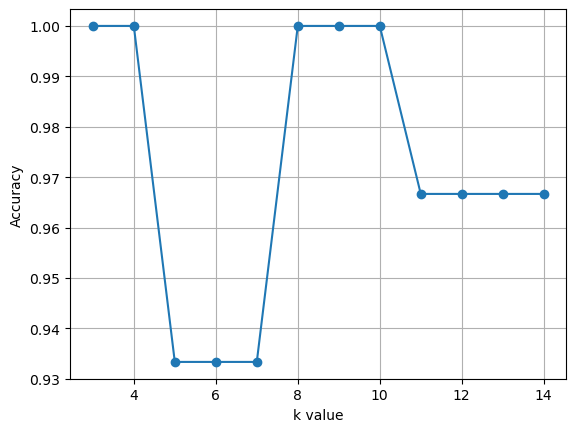

In [224]:
#Plot the accuracy and find the optimum k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [225]:
#Take k = 4 as optimum value
#Using the optimum k value and print its accuracy
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy = ",acc)   

Accuracy =  1.0


C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [226]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='micro'))
print('Recall = ',recall_score(y_test,y_pred,average='micro'))
print('f1 score = ',f1_score(y_test,y_pred,average='micro'))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0


# SVM

In [227]:
#SVM Using Linear kernal
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [228]:
y_pred_svm = svmclf.predict(x_test)

In [229]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [230]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  1.0


In [231]:
print(confusion_matrix(y_test,y_pred_svm))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [240]:
#SVM Using rbf kernal
from sklearn.svm import SVC
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)

SVC()

In [241]:
y_pred_svm=svmclf.predict(x_test)

In [242]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  1.0


In [243]:
#SVM Using Polynomial kernal
from sklearn.svm import SVC
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [244]:
y_pred_svm=svmclf.predict(x_test)

In [245]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  1.0


# Decision Tree

In [232]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [233]:
y_pred_dt=dt_clf.predict(x_test)

In [234]:
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))

Accuracy =  0.9666666666666667


In [235]:
print(confusion_matrix(y_test,y_pred_dt))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [237]:
y_pred_rf = rf_clf.predict(x_test)

In [238]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))

Accuracy =  1.0


In [239]:
print(confusion_matrix(y_test,y_pred_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [246]:
#Random Forest - Specify no of trees = 50
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [247]:
y_pred_rf = rf_clf.predict(x_test)

In [248]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))

Accuracy =  1.0
